# Market Segmentation using Cluster Analysis

### Import the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

### Load the Dataset

In [8]:
df = pd.read_csv ("Customer Analysis.csv")
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


The dataset consist of Satisfaction and Customer Loyalty. 

Satisfaction data are self-reported where it is obtsined through customer surveys.

Brand Loyalty data are calculated based on customer purchases within a year + with other factors. It is ranging from -2.5 to 2.5. In this case, it has been standardised. 

### Plot the Data

Text(0, 0.5, 'Loyalty')

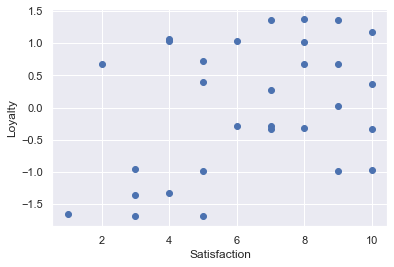

In [11]:
plt.scatter(df["Satisfaction"], df["Loyalty"])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

If we divide the plot into four, we can categorised it into 4 clusters:
- Top left: Low satisfaction, high loyalty
- Bottom left: Low satisfaction, low loyalty
- Top Right: High satisfaction, high loyalty
- Bottom Right: High satisfaction, low loyalty

However, it seems like we can cluster it into two (As for now, this still the assumptions)


### Now Exploring it using Python K-Means

### Select Features

In [12]:
x= df.copy()

### Build Cluster Model

In [15]:
kmeans=KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

#### Results of the clustering

In [16]:
clusters = x.copy()
clusters["Predicted Cluster"]= kmeans.fit_predict(x) 

Text(0, 0.5, 'Loyalty')

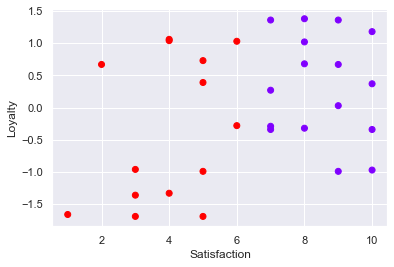

In [18]:
# Plotting the results

plt.scatter(clusters["Satisfaction"], clusters["Loyalty"], c=clusters["Predicted Cluster"], cmap="rainbow")
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

As we can see, the KMeans algorithm seems to only considered satisfaction as a feature and not loyalty. This is because we do not standardised the variables, making the satisfaction to have high WEIGHT. So, we need to standardised the features, so that all features will be treated equally.

### Standardizing the Variables

In [19]:
# Import a library 
from sklearn import preprocessing
# Scale the inputs
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### Check Optimum number of Clusters - using Elbow Method 

In [20]:
# Calculating WCSS (Within Cluster Sum of Squares)
# I will try to calculate WCSS for number of cluster from 1 to 9. 
# As we all know, we want WCSS to be as low possible. 

wcss=[]

for i in range(1,10):                     # Creating the iteration for the calculation of WCSS
    kmeans = KMeans(i)                   # Define KMeans with iteration
    kmeans.fit(x_scaled)                 # Fit the model using standardised data
    wcss_iteration=kmeans.inertia_      # Calculation of WCSS 
    wcss.append(wcss_iteration)        # Import the calculated WCSS into list
    
# Check results
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.445278296590019,
 4.352037765292863,
 3.7504443965485494]

Text(0, 0.5, 'WCSS')

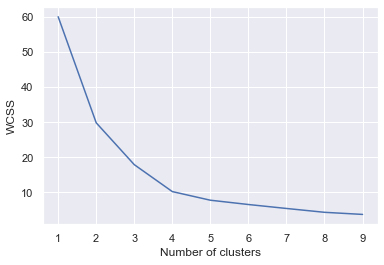

In [21]:
# Plotting Elbow Graph

# Plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Usually, we want minimum value of WCSS. However, we need to try which one fit our models, depending on our domain.


## Explore clustering solutions and select the number of clusters

In [32]:
# I will try to input 2-9 value of clusters
kmeans_new=KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new=x.copy()
clusters_new["Predicted Cluster"]=kmeans_new.fit_predict(x_scaled)

In [33]:
# Check if everything seems right
clusters_new

,Satisfaction,Loyalty,Predicted Cluster
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,3
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,2
9,8,0.68,2


Text(0, 0.5, 'Loyalty')

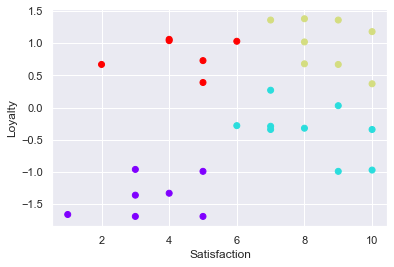

In [34]:
# Plot
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['Predicted Cluster'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')


# We should know that the cluster analysis here is based on the standardised value

After imputing the number of cluster from 2 to 9, I do believe that for this case, number of clusters = 4 are quite good because we can group the customers based on their satisfaction and loyalty. 

As for conclusion, I can say that we can group the customers to 4 groups where:
- Purple: Alienated - Feel not satisfied with the brand
- Red:  Supporters of the brand
- Blue: Roamers - They like and satisfied with the brand but they tend to try other brand
- Green: Fans of the brand


In business perspective, the company wants their customers to become the fans of their brands. So by doing this cluster analysis, they can improve the feedback from the different cluster. In general, they will focus more on addressing the satisfaction of Roamers and supporters first, before proceeding with the alienated. This can be done by introducing discount vouchers, sales and etc so that they can improve the customer experiences.